In [1]:
%matplotlib inline

from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
class Tiling:
    def __init__(self, _beampositions = np.zeros((1,1)), _random = False, _usebeams=396):
        self.usebeams = _usebeams
        self.beampositions = _beampositions
        self.random = _random
        
        if self.random:
            self.columns = random.randrange(1, 101)
            self.rows = random.randrange(1, 101)
            print("Random array with %i rows and %i columns" % (self.rows, self.columns))
            
    def PlotBeams(self):
        fig = plt.figure(figsize=(15,10))
        ax = fig.gca()
    
    def PrepareMatrix(self):
        print("Preparing the coverage matrix...")
        
        if self.random:
            self.coverage = np.zeros((self.rows, self.columns))
            for row in np.arange(self.rows):
                for column in np.arange(self.columns):
                    self.coverage[row, column] = random.choice([0, 0, 1])
    
    def ShowCoverage(self):
        print(self.coverage)
        
        fig = plt.figure(figsize=(15,10))
        ax = fig.gca()
        
        cmap = colors.ListedColormap(['white', 'black'])
        
        ax.imshow(self.coverage, interpolation='none', cmap=cmap)
    
    
    def Solve(self):
        print("Finding the optimum tiling...")

In [3]:
testarray = np.zeros((5, 7))

testarray.shape[1]

for row in np.arange(testarray.shape[0]):
    for column in np.arange(testarray.shape[1]):
        testarray[row, column] = random.choice([0, 0, 1])

print(testarray)

[[0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0.]]


Random array with 57 rows and 78 columns
Preparing the coverage matrix...
[[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


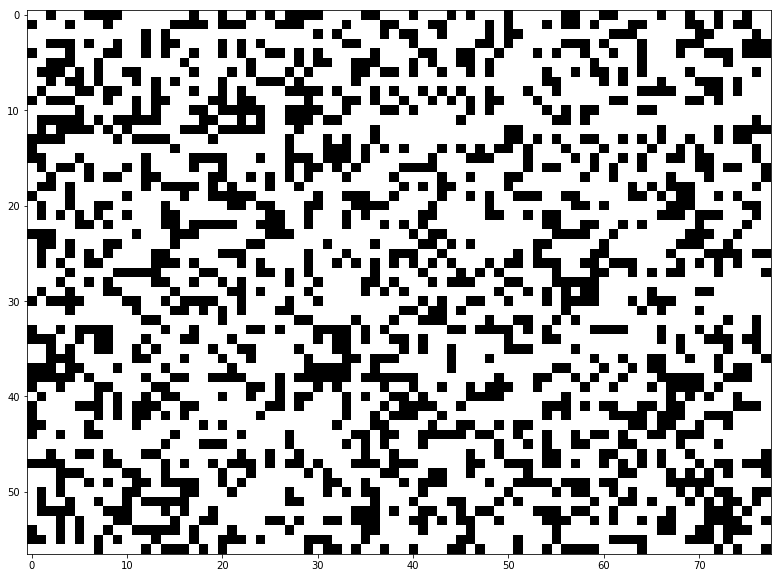

In [4]:
tiling = Tiling(_random=True)
tiling.PrepareMatrix()
tiling.ShowCoverage()

<h2>Algorithm X</h2>
<ol> 
    <li> Construct a matrix, A with <i>n</i> columns, where <i>n</i> is the sum of the number of elements used to cover the field and the number of cells to be covered - this ensures we have a way of identifying which elements cover which fields - this is not 100% necessary if we're using a single shape only. In our case we do not need to worry about the exact coverage of the elements columns - we are going to use the same shape more than one - only one shape in the most extreme cases.</li>
    <li> Construct rows use to represent all possible valid positions of the covering elements - 1 in the column identifying the piece and 1s in all the columns identifying cells covered by given element.</li>
    <li> Look for solutions that have exaclty one 1 in each column, i.e. each cell is covered by one element only and there are no overlapping elements.</li>
    <ol> 
        <li>If matrix A is empty (all 0s) - problem solved, terminate successfully</li>
        <li>Deterministically choose column, c - chooce column which has the fewest 1s, leading to the lowest number of branches in laters stages of the algorithm</li>
        <li>Nondeterministically chooise a row, r such that A[r, c] = 1 - this is the place where the algorithm splits into small subalgorithms</li>
        <li>Include r in the partial solution</li>
    </ol>
</ol>

<h2>Some optimisation ideas for Algorithm X</h2>
<ul>
    <li> First check if there are any columns that are all filled with 0s - that means there is no cover for that column and we can't get exact coverage - in this case we can remove this column and other columns with zero coverage down to the prescribed number of beams which we HAVE to use, e.g. 396 for MeerTRAP</li>
    <li> 
</ul>

In [5]:
column_sums = np.sum(testarray, axis=0)
print(column_sums)
if 0 in column_sums:
    print("Solution does not exist")

[0. 3. 0. 2. 2. 2. 2.]
Solution does not exist
